Problem 1

In [ ]:
import numpy as np
import pandas as pd

# X is a dataframe of the independent variables
# y is a series of the values -- dependent variable
# t is number of steps
# alpha is step size
def grad_desc_linreg (X,y,T,alpha):
  _, n = X.shape
  loss = np.zeros(T)
  theta = np.zeros(n)

  # number of iterations
  for i in range(T):
    # add in the cost at each iteration
    loss[i] = .5*np.linalg.norm(X.dot(theta) - y)**2
    gradient =  (X.T.dot(X.dot(theta) - y))
    # update theta
    theta = theta - alpha*gradient
  return theta, loss

Problem 2

Given this function: 

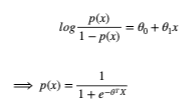


Hypothesis function:

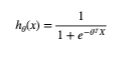


More specifically:

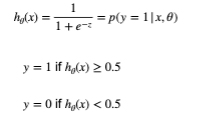

We want to minimize this, with a convex cost function:

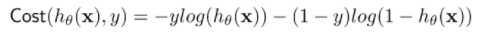

And therefore we minimize: 


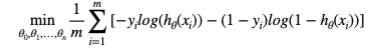


Applying this to a multivariate equation: 

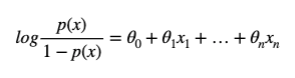

In order to use this, the gradient is the multivariate generalization of the derivative, it is the vector of all n derivatives:

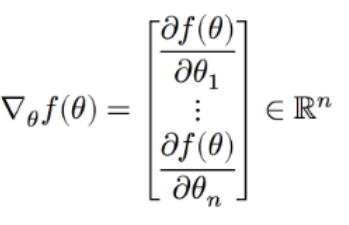




With this, repeat:

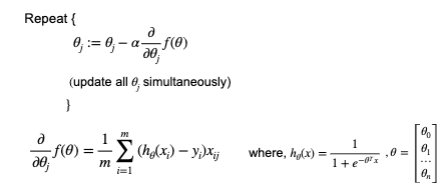


Compute the gradient:

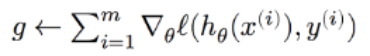

Update Parameters:

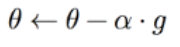



Generalizing this statement: 

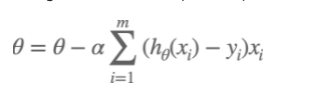


Problem 3

In [ ]:
# X is a dataframe of the independent variables
# y is a series of the values -- dependent variable
# t is number of steps
# alpha is step size


# Batch version
def hyp(x):
  return np.exp(x)/(1+ np.exp(x))
def grad_desc_logreg (x,y,T,alpha):
  _, n = x.shape
  losslog = np.zeros(T)
  theta = np.zeros(n)

  # number of iterations
  for i in range(T):
    # calculate hypothesis function/p(x)
    hypothesis = hyp(x.dot(theta))
    # add the loss/cost each iteration
    losslog[i] = (np.log(1+np.exp(hypothesis.dot(y))))
    gradient =  (x.T.dot(hypothesis - y))
    # update theta
    theta = theta + alpha*gradient
  return theta, losslog

Problem 4

Text(0, 0.5, 'Simulated Parameters')

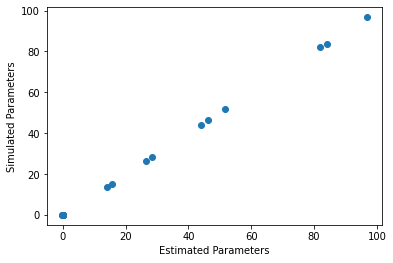

In [ ]:
# simulate data for linear 
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.linear_model as lm


#simulate data for linear regression
# get the linear regression coefficients from sklearn
gen_data_x, gen_data_y, coef = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5, coef = True)

T = 500
# find the value of coefficients based on gradient descent
theta , loss = grad_desc_linreg(gen_data_x, gen_data_y, T, .001)


# theta is estimated, coef is simulation
plt.scatter(theta,coef)
plt.xlabel('Estimated Parameters')
plt.ylabel('Simulated Parameters')


Text(0, 0.5, 'Cost')

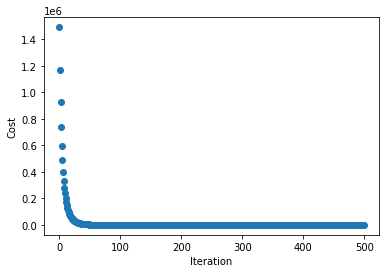

In [ ]:
# Make sure you are minimizing 
plt.scatter(range(T), loss)
plt.xlabel('Iteration')
plt.ylabel('Cost')

Text(0, 0.5, 'Simulated Parameters')

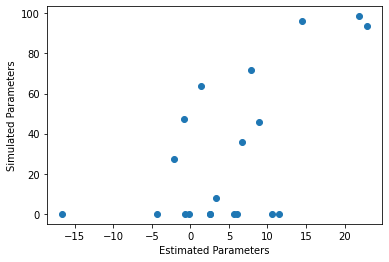

In [ ]:
#simulate data for logistic regression.  This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y, coef2 = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5, coef = True)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]

T = 500
# find the value of coefficients based on gradient descent
theta2 , loss2 = grad_desc_logreg(log_gen_data_x, log_gen_data_y, T, .001)

# theta is estimated, coef is simulation

plt.scatter(theta2,coef2)
plt.xlabel('Estimated Parameters')
plt.ylabel('Simulated Parameters')



Text(0, 0.5, 'Cost')

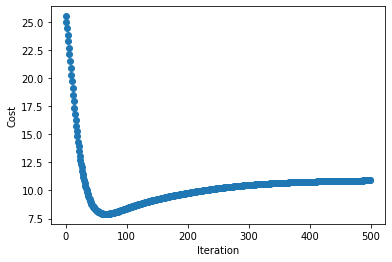

In [ ]:
# Make sure you are minimizing 
plt.scatter(range(T), loss2)
plt.xlabel('Iteration')
plt.ylabel('Cost')

Problem 4 

This data is composed of 30 dimensions (features) with binary classification of either having cancer or not. This means whether a tumor is malignant or benign. There are 529 samples in total, meaning it is a small enough to do a simple classification analysis with.

The first predictor is a Random Forest where I used 75 n-estimators which corresponds to the number of trees in the forest and 'auto' max features (which is equivalent to sqrt)

In [ ]:
# First Predict with Random Forest
from  sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import classification_report

# Only binary data, not ncessarily to change the target variables
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(\
                          cancer.data,cancer.target, test_size = .3)

forest = RandomForestClassifier(n_estimators = 75)
forest.fit(x_train, y_train)

print(f'10 Fold Cross Value Score:\
 {cross_val_score(forest, x_train, y_train, cv = 10)}')
print(f'Model Accuracy: {forest.score(x_test,y_test)*100}%')
print(f'Classification Report:\n\
    {classification_report(y_test, forest.predict(x_test))}')

10 Fold Cross Value Score: [0.975      0.975      0.925      0.875      0.925      0.975
 0.925      0.95       0.92307692 0.97435897]
Model Accuracy: 95.90643274853801%
Classification Report:
                  precision    recall  f1-score   support

           0       0.98      0.91      0.94        66
           1       0.95      0.99      0.97       105

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



The second predictor is a non-linear Support Vector Machine: Used a Grid Search over all parameters listed to find the value with the best cross value score. Hyperparameters are derived within the function.

In [ ]:
# Second Predict with non-linear SVM (Support Vector Machine)
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

x_train1, x_test1, y_train1, y_test1 = train_test_split(\
                          cancer.data,cancer.target, test_size = .33)
hyperparameters = [{'kernel' : ['rbf'], 'gamma': [1e-3,1e-4],\
                   'C' : [1,10,100]},
                   {'kernel' : ['poly'], 'gamma': [1e-3,1e-4],\
                   'C' : [1,10,100], 'degree' : [3,5,10]}]

x_test1 = preprocessing.scale(x_test1)
x_train1 = preprocessing.scale(x_train1)
clf = GridSearchCV(svm.SVC(C=1), hyperparameters, cv = 5, scoring=\
                   'precision')
clf.fit(x_train1, y_train1)


print(f'10 Fold Cross Value Score:\
 {cross_val_score(clf, x_train1, y_train1, cv = 10)}')
print(f'Model Accuracy: {clf.score(x_test1,y_test1)*100}%')
print(f'Classification Report:\n\
    {classification_report(y_test1, clf.predict(x_test1))}')

10 Fold Cross Value Score: [0.96       1.         1.         1.         1.         1.
 0.92       0.95652174 1.         0.92      ]
Model Accuracy: 96.82539682539682%
Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.94      0.97        66
           1       0.97      1.00      0.98       122

    accuracy                           0.98       188
   macro avg       0.98      0.97      0.98       188
weighted avg       0.98      0.98      0.98       188



In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# Third Predict With the Logistic Regression
x_train2, x_test2, y_train2, y_test2 = train_test_split(\
                          cancer.data,cancer.target, test_size = .33)
T = 50000
theta2, loss2 = grad_desc_logreg(x_train2, y_train2, T, .00000000001 )
y_predict2 = list(hyp(x_test2.dot(theta2)).round())

#training accuracy  (overall)
score = 0
for i  in range(len(y_predict2)):
  if  y_predict2[i] > 0:
    y_predict2[i] = 1
  if y_predict2[i] == y_train2[i]:
    score+=1;

print(f'Training Accuracy: {score/len(y_predict2)*100}%')

#testing accuracy (overall): only one testing and training set
score = 0
y_predict2 = np.nan_to_num(y_predict2)
for i  in range(len(y_predict2)):
  if  y_predict2[i] > 0:
    y_predict2[i] = 1
  if y_predict2[i] == y_test2[i]:
    score+=1;

print(f'Testing Accuracy: {score/len(y_predict2)*100}%') 

Training Accuracy: 59.04255319148937%
Testing Accuracy: 67.5531914893617%


In [ ]:
# scikit-learn k-fold cross-validation (of logistic regression)
from sklearn.model_selection import KFold
# data sample
data = cancer.data
target = cancer.target
cross_val = np.zeros(10)

T = 8000
# split into 10 groups
kfold = KFold(10)
j =0;
# iterate through the different splits
for train, test in kfold.split(data):
  theta, loss = grad_desc_logreg(data[train], target[train], T, .00000000005)
  y_predict = ((hyp(data[test]).dot(theta)))

  #testing accuracy (for each group) -- to get cross value
  score = 0
  y_predict = np.nan_to_num(y_predict)
  for i  in range(len(y_predict)): 
    if  y_predict[i] > 0:
      y_predict[i] = 1
    if y_predict[i] == (target[test])[i]:
      score+=1
  # add to cross_val array
  cross_val[j] = score/(len(y_predict))
  j = j + 1
print(cross_val)
print(f'Model Accuracy: {sum(cross_val)/10*100}%')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


[0.9122807  0.94736842 0.78947368 0.94736842 0.92982456 0.87719298
 0.89473684 0.84210526 0.77192982 0.875     ]
Model Accuracy: 87.87280701754385%


For the first two models, I am using the built in 10-fold cross validation procedures. For my logistic algorithm I am splitting the data using KFold into 10 sections. I am then repeating the overall process I did earlier, where I compared my predicted values to my original overall score 10 times. Within this, when I take the average I get the overall score. 

The results in total are shown below. Based on this data and experimenting to find the highest CV score possible, the best value is the SVM with an overall value of 96.83%. 

Random Forest: 10 Fold Cross Value Score: [0.975, 0.975, 0.925, 0.875, 0.925,  0.975, 0.925, 0.95, 0.92307692, 0.97435897]: 95.90643274853801%



SVM: [0.96, 1., 1., 1., 1., 1., 0.92, 0.95652174, 1., 0.92]: 96.82539682539682%



Logistic Regression: [0.9122807,  0.94736842, 0.78947368, 0.94736842, 0.92982456 0.87719298, 0.89473684, 0.84210526, 0.77192982, 0.875]: 87.87280701754385%